In [233]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("winequality-red.csv")

In [234]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


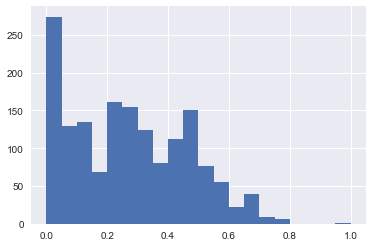

In [235]:
plt.hist(data['citric acid'], bins = 20)
plt.show()

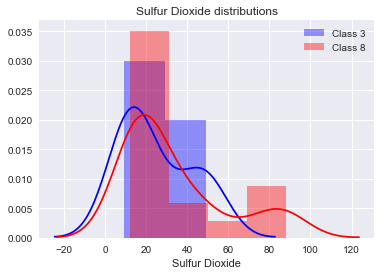

In [236]:
sns.distplot(data[data['quality'] == 3]['total sulfur dioxide'],label = 'Class 3', color = 'blue')
sns.distplot(data[data['quality'] == 8]['total sulfur dioxide'],label = 'Class 8', color = 'red')
plt.legend()
plt.xlabel('Sulfur Dioxide')
plt.title('Sulfur Dioxide distributions')
plt.show()

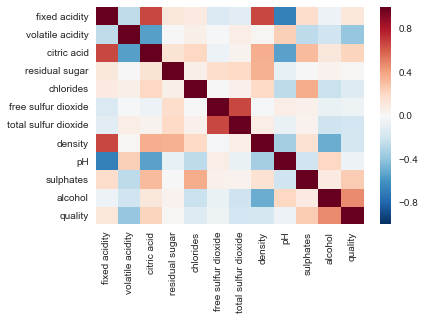

In [237]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Only a few variables are correlated, **PCA** would not help much reducing the the number of variables since this is the case.

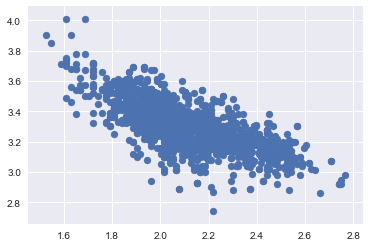

In [238]:
plt.scatter(np.log(data['fixed acidity']), data['pH'])
plt.show()

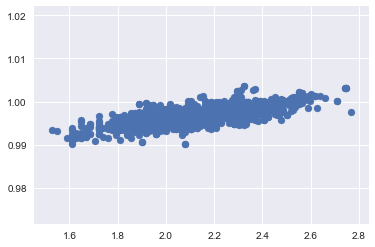

In [239]:
plt.scatter(np.log(data['fixed acidity']), data['density'])
plt.show()

In [228]:
# Create target variable
target = data['quality']

# Create feature dataframe
features = data.drop(['quality'], axis = 1)

In [230]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

feature_labels = features.columns
# Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=-1)
model = model.fit(X_train, y_train)
importances = model.feature_importances_

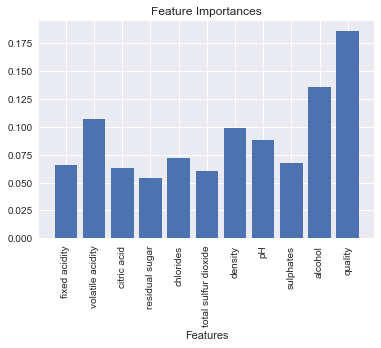

In [231]:

data = {}
for i in range(len(feature_labels)):
    data[feature_labels[i]] = importances[i]
    
plt.bar(range(len(data)), data.values(), align='center')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.xticks(range(len(data)), list(data.keys()), rotation = 90)
plt.show()

In [210]:
preds = model.predict(X_test)

In [188]:

# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)


print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1279 samples.
Testing set has 320 samples.


In [189]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
accuracy_RF = accuracy_score(y_test,preds)

In [190]:
accuracy_RF

0.0

In [122]:
from sklearn import preprocessing
features_scaled = preprocessing.scale(features)

In [129]:
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)

In [131]:
features_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [176]:
from sklearn import svm
clf = svm.SVC(C = .5, gamma = 0.09)
clf.fit(X_train, y_train)  

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [177]:
svm_preds = clf.predict(X_test)

In [178]:
accuracy_SVM = accuracy_score(y_test,svm_preds)

In [179]:
accuracy_SVM

0.59062499999999996